In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import os
import env
import acquire as a
import prepare as p
import wrangle as w

#visual imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests
from vega_datasets import data

import warnings
warnings.filterwarnings("ignore")

# SF Temps Dataset

In [2]:
from vega_datasets import data

sf = data.sf_temps()
sf.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# set date as index
sf = sf.set_index('date')
sf.head(3)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9


## Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
sf_day_mean = sf.resample('D').mean()
sf_day_mean.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

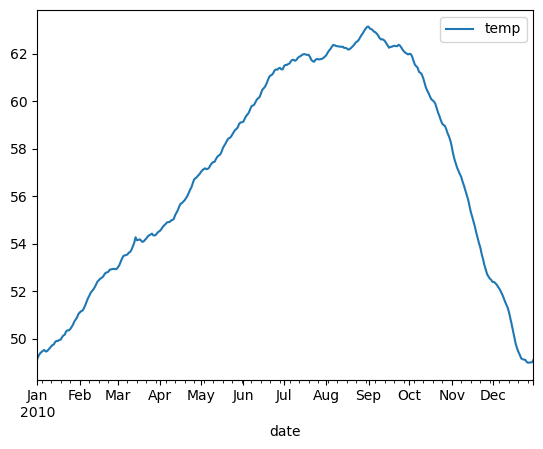

In [6]:
sf_day_mean.plot()

## Write the code necessary to visualize the minimum temperature over time.

In [7]:
sf.resample('w').min().head()

,temp
date,
2010-01-03,45.8
2010-01-10,46.0
2010-01-17,46.1
2010-01-24,46.2
2010-01-31,46.5


<AxesSubplot:xlabel='date'>

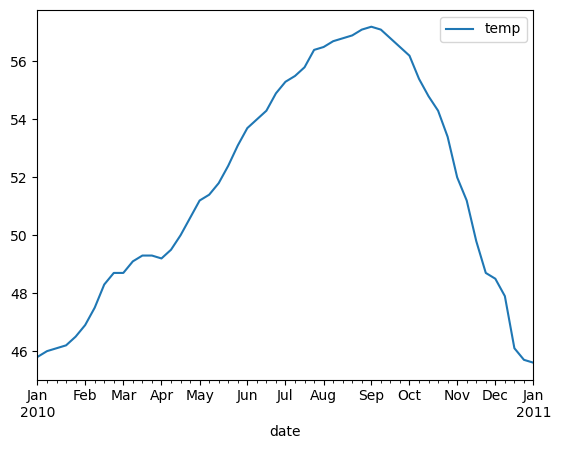

In [8]:
sf.resample('w').min().plot()

## Write the code necessary to visualize the maximum temperature over time.

In [9]:
sf.resample('w').max().head()

,temp
date,
2010-01-03,53.5
2010-01-10,54.1
2010-01-17,54.7
2010-01-24,55.3
2010-01-31,56.2


<AxesSubplot:xlabel='date'>

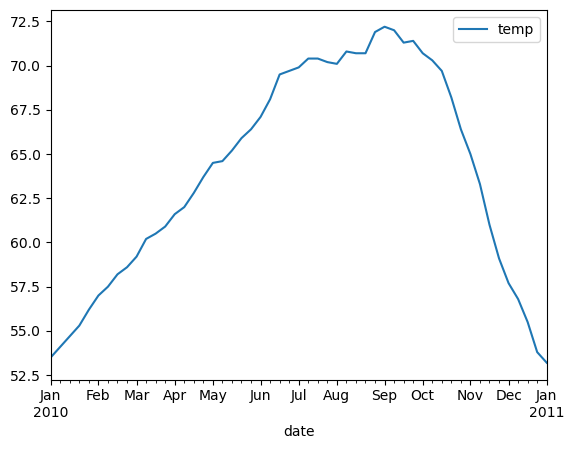

In [10]:
sf.resample('w').max().plot()

## Which month is the coldest, on average?

In [11]:
sf.resample('m').mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

**January is coldest on average**

## Which month has the highest average temperature?

In [12]:
sf.resample('m').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

**September has highest average**

## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
sf_min_max = sf.temp.resample('d').agg(['min','max'])
sf_min_max.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [14]:
sf_min_max.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   min     365 non-null    float64
 1   max     365 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [15]:
sf_min_max.columns

Index(['min', 'max'], dtype='object')

In [16]:
sf_min_max['dif'] = sf_min_max['max'] - sf_min_max['min']
sf_min_max.head()

,min,max,dif
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


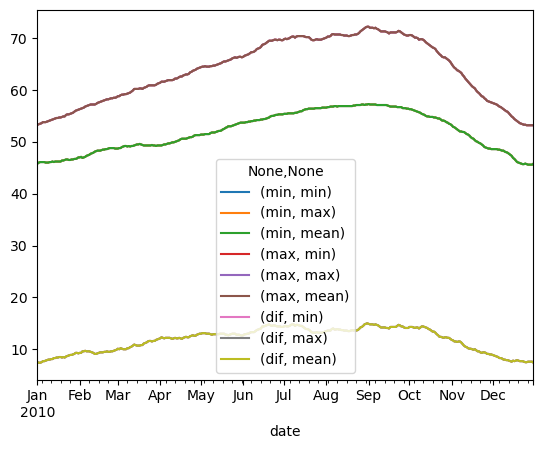

In [17]:
sf_min_max.resample('d').agg(['min','max','mean']).plot()
plt.show()

# Seattle Weather

In [18]:
weather = data.seattle_weather()
weather.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [20]:
# set date as index
weather = weather.set_index('date')
weather.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain


## Which year and month combination has the highest amount of precipitation?

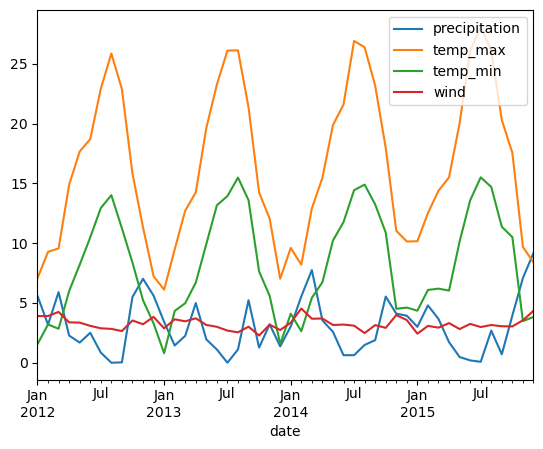

In [21]:
weather.resample('m').mean().plot()
plt.show()

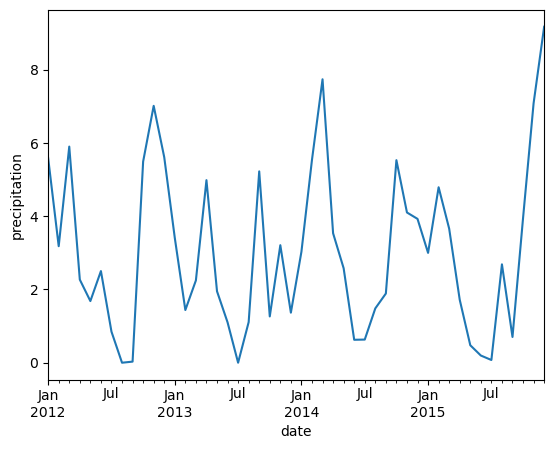

In [22]:
# Only precipitation resampled
weather.precipitation.resample('m').mean().plot()
plt.ylabel('precipitation')
plt.show()

In [23]:
weather.precipitation.resample('m').mean().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [24]:
# Dataframe showing Year and Month combo of highest avg precipitation.
weather.resample('m').mean().sort_values('precipitation', ascending=False).head(3)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.177419,8.380645,3.825806,4.341935
2014-03-31,7.741935,12.906452,5.425806,3.677419
2015-11-30,7.086667,9.683333,3.480000,3.546667


**Dec 2015 has the highest prec**

## Visualize the amount of monthly precipitation over time.

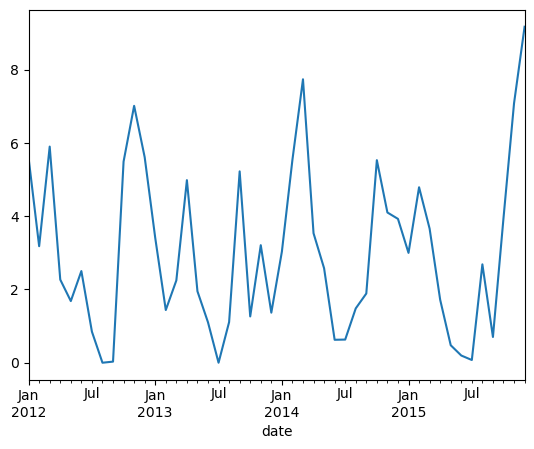

In [25]:
# Monthly avg precipitation over time
weather.precipitation.resample('m').mean().plot()
plt.show()

## Visualize the amount of wind over time. Choose a time interval you think is appropriate.

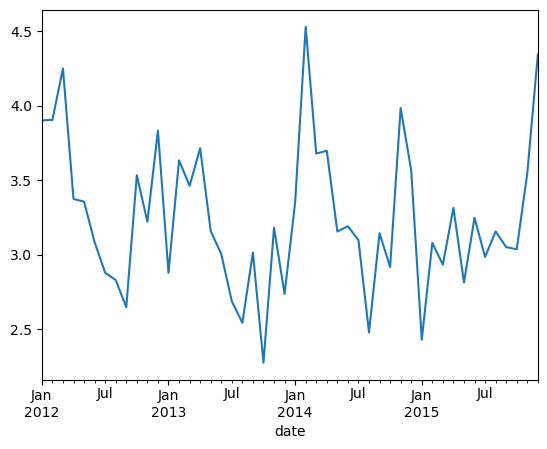

In [26]:
# Monthly avg wind over time
weather.wind.resample('m').mean().plot()
plt.show()

## Which year-month combination is the windiest?

In [27]:
weather.wind.resample('m').mean().idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

In [28]:
weather.resample('m').mean().sort_values('wind', ascending=False).head()

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.200000,2.635714,4.528571
2015-12-31,9.177419,8.380645,3.825806,4.341935
2012-03-31,5.903226,9.554839,2.838710,4.248387
2014-11-30,4.103333,11.030000,4.510000,3.983333
2012-02-29,3.182759,9.275862,3.203448,3.903448


**February 2014 is the windiest**

## What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [29]:
weather.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain


In [30]:
# Changing sun to 1 to make it countable 
sunny = weather[weather['weather'] == 'sun'].replace('sun','1').astype(int)

In [31]:
sunny.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0,10,2,2,1
2012-01-11,0,6,-1,5,1
2012-01-12,0,6,-1,1,1


In [32]:
# Resample for year and sort by weather
sunny.resample('y').sum().sort_values('weather', ascending=False)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-12-31,67,3844,1811,568,211
2013-12-31,127,3696,1811,464,205
2015-12-31,18,3639,1729,466,180
2012-12-31,0,2336,1008,318,118


**2014 was the sunniest year**

## In which month does it rain the most?

In [33]:
# Changing rain to 1 to make it countable 
rainy = weather[weather['weather'] == 'rain'].replace('rain','1').astype(int)

In [34]:
rainy.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10,10,2,4,1
2012-01-03,0,11,7,2,1
2012-01-04,20,12,5,4,1


In [35]:
# Resample for month and sort by weather
rainy.resample('m').sum().sort_values('weather', ascending=False).head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-11-30,201,285,139,74,25
2012-12-31,108,171,82,76,23
2013-02-28,35,207,96,80,23
2012-03-31,113,163,58,71,19
2012-04-30,55,254,118,58,19


**November 2012 rained the most**

<AxesSubplot:xlabel='date'>

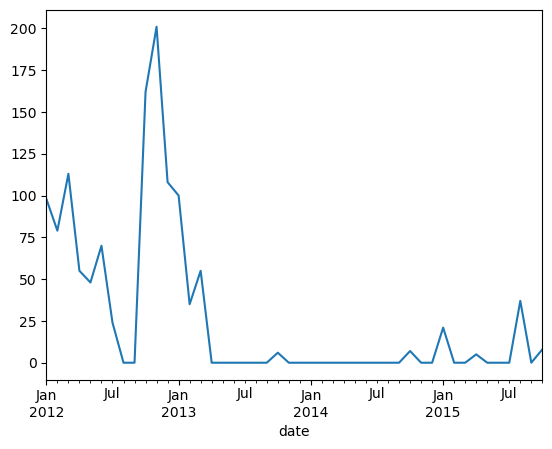

In [36]:
rainy.precipitation.resample('m').sum().plot()

## Which month has the most number of days with a non-zero amount of precipitation?

In [37]:
weather['precipitation'] != 0

date
2012-01-01    False
2012-01-02     True
2012-01-03     True
2012-01-04     True
2012-01-05     True
              ...  
2015-12-27     True
2015-12-28     True
2015-12-29    False
2015-12-30    False
2015-12-31    False
Name: precipitation, Length: 1461, dtype: bool

In [38]:
some_prec = weather[weather['precipitation'] > 0]
some_prec.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain


In [39]:
# Adding a countable column for each observation
some_prec['droplet'] = 1

In [40]:
some_prec.resample('m').sum().sort_values('droplet', ascending=False).head()

,precipitation,temp_max,temp_min,wind,droplet
date,,,,,
2012-12-31,174.0,201.6,96.0,111.3,27
2015-12-31,284.5,220.9,116.6,116.8,25
2012-01-31,173.3,149.8,43.3,96.4,22
2012-03-31,183.0,189.5,62.4,95.8,22
2015-11-30,212.6,202.8,97.3,74.8,20


**December 2012 has the most number of days with some precipitation**

# Flights

In [41]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


## Convert any negative delays to 0.

In [42]:
# np.where(condition, replacement, value if not replaced)
flights['delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])
flights.head(5)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


## Which hour of the day has the highest average delay?

In [43]:
flights = flights.set_index('date')

In [44]:
flights.delay.resample('H').mean()

date
2001-01-01 00:00:00    14.000000
2001-01-01 01:00:00          NaN
2001-01-01 02:00:00          NaN
2001-01-01 03:00:00          NaN
2001-01-01 04:00:00          NaN
                         ...    
2001-03-31 17:00:00    11.666667
2001-03-31 18:00:00    12.538462
2001-03-31 19:00:00    22.125000
2001-03-31 20:00:00    27.600000
2001-03-31 21:00:00    11.200000
Freq: H, Name: delay, Length: 2158, dtype: float64

In [45]:
flights['hour'] = flights.index.strftime('%H')
flights.head(3)

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18


In [46]:
flights.groupby('hour').mean()

,delay,distance
hour,,
00,127.916667,424.583333
01,170.000000,256.000000
03,302.500000,322.000000
05,0.513514,327.702703
06,2.494856,448.913580
07,3.071932,530.179126
08,4.030483,558.536059
09,5.002504,563.075125
10,5.850953,513.748700


## Does the day of the week make a difference in the delay amount?

In [47]:
flights.head(3)

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18


In [48]:
flights['year'] = flights.index.year
flights['month'] = flights.index.month
flights['day'] = flights.index.day
flights['dayofweek'] = flights.index.dayofweek
flights.head(3)

,delay,distance,origin,destination,hour,year,month,day,dayofweek
date,,,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,2001,1,13,5
2001-01-31 16:40:00,0,1093,FLL,ISP,16,2001,1,31,2
2001-02-11 18:39:00,3,293,LBB,DAL,18,2001,2,11,6


In [49]:
flights.groupby('dayofweek').mean().sort_values('delay', ascending=False)

,delay,distance,year,month,day
dayofweek,,,,,
4,17.757596,501.118230,2001.0,2.082893,14.803170
3,12.821322,485.175025,2001.0,2.087679,13.559947
2,11.032478,501.009094,2001.0,1.942839,16.906138
6,10.413542,507.987758,2001.0,1.996557,15.343535
1,9.410866,496.021732,2001.0,1.928014,16.389813
5,8.431498,550.889031,2001.0,2.069996,15.711054
0,7.165772,505.032215,2001.0,1.964430,15.771477


**Yes, Friday has the most delays**

## Does the month make a difference in the delay amount?

In [50]:
flights.groupby('month').mean()

,delay,distance,year,day,dayofweek
month,,,,,
1,11.301592,500.391952,2001.0,16.081515,2.758255
2,12.306106,511.156170,2001.0,14.325767,2.913203
3,9.875287,504.712069,2001.0,15.973276,2.975575


**Yes, very slightly though. Only a few minutes difference between Feb and March**

In [51]:
flights[flights['month'] == 3].head(3)

,delay,distance,origin,destination,hour,year,month,day,dayofweek
date,,,,,,,,,
2001-03-30 21:45:00,0,229,STL,IND,21,2001,3,30,4
2001-03-14 14:55:00,3,405,MCI,MDW,14,2001,3,14,2
2001-03-14 19:04:00,20,1999,BWI,PHX,19,2001,3,14,2
